# Credit Card Fraud Detection Project

Credit card fraud is a major concern for banks and financial institutions. Fraudsters use various
techniques to steal credit card information and make unauthorized transactions. In this project,
we will explore a dataset containing credit card transactions and build models to predict
fraudulent transactions.The features include 'Time', 'Amount', and 'V1' through 'V28', as well as the 'Class' variable, which isthe target variable indicating whether the transaction is fraudulent (1) or not (0).
In this

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report,f1_score, confusion_matrix, roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the data
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()

1081

In [7]:
df = df.drop_duplicates()

In [8]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


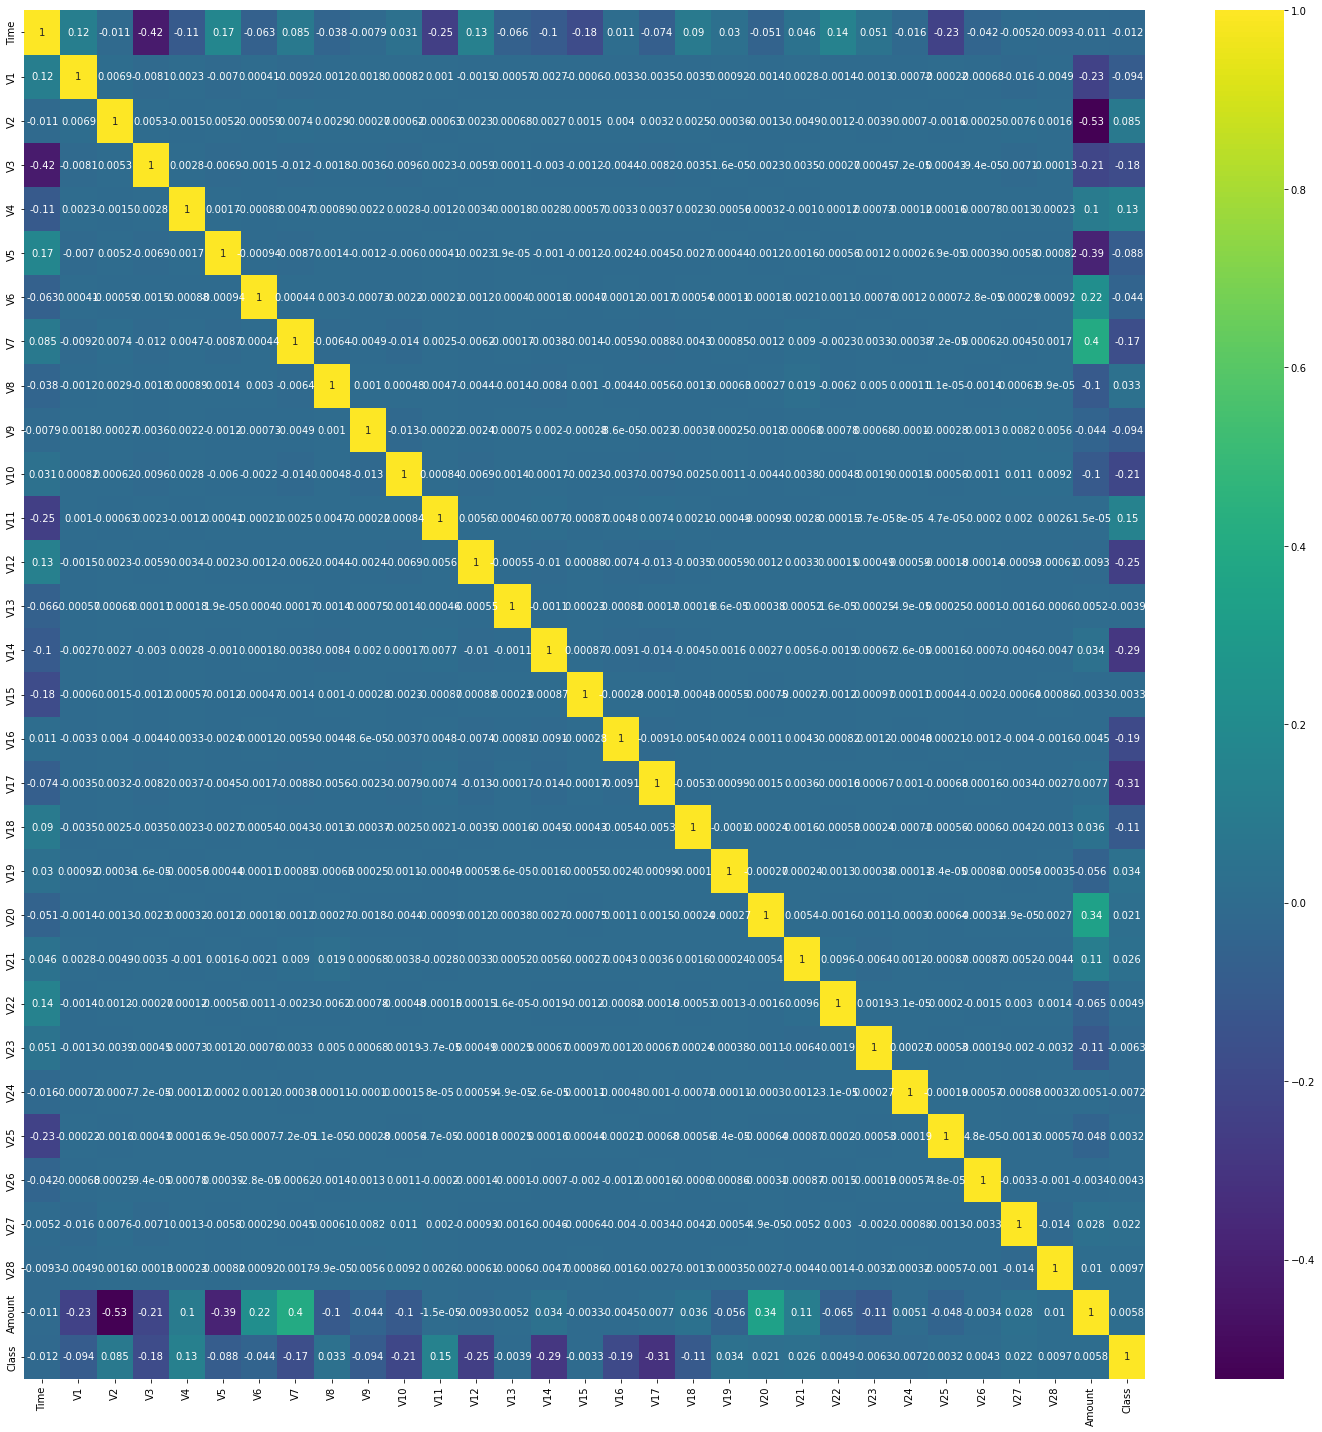

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.tight_layout()
plt.show()

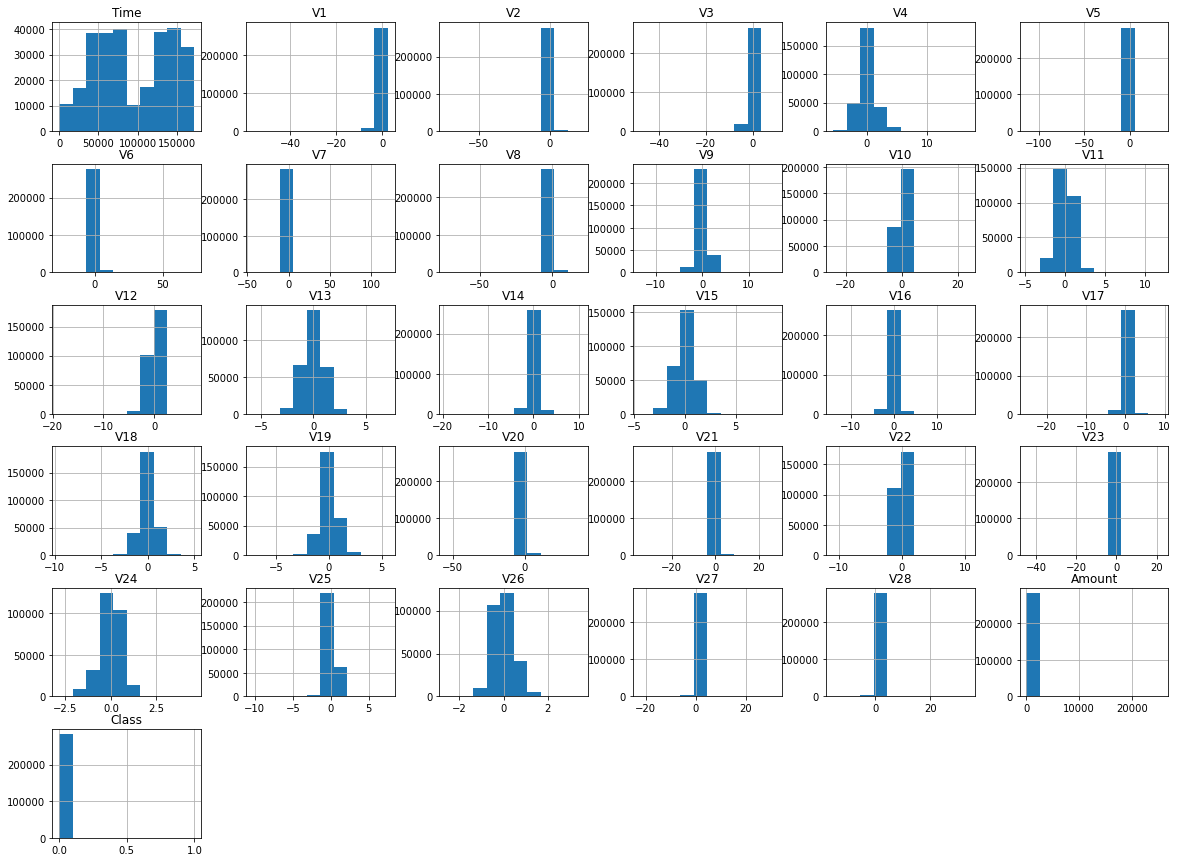

In [10]:
df.hist(figsize=(20,15))
plt.show()

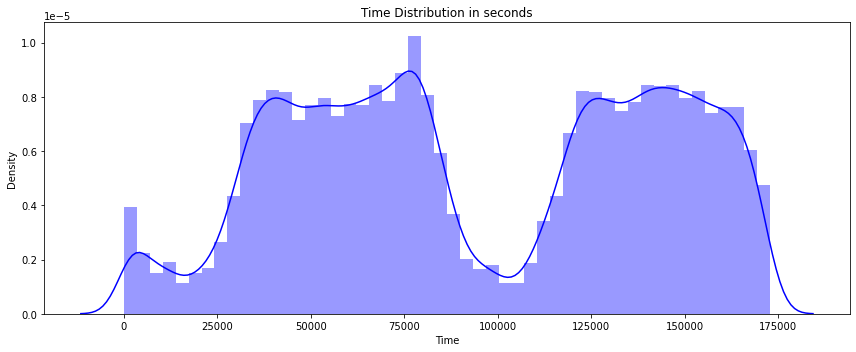

In [11]:
# Plot Distribution of 'Time' 
plt.figure(figsize=(12,5))
sns.distplot(df['Time'], color='blue')
plt.xlabel('Time')
plt.ylabel('Density')
plt.title("Time Distribution in seconds")
plt.tight_layout()
plt.show()

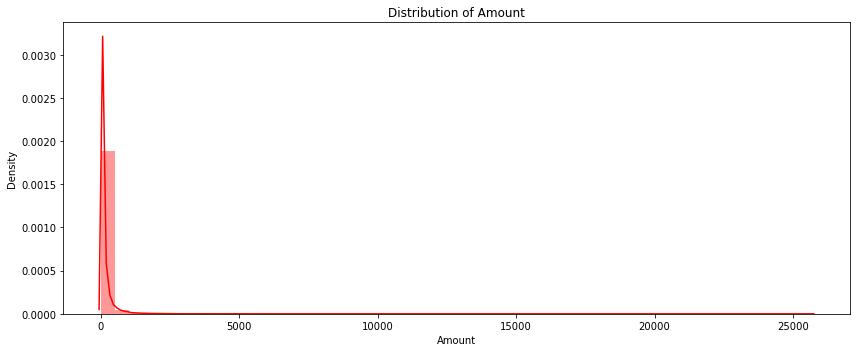

In [12]:
# Plot Distribution of 'Amount' 
plt.figure(figsize=(12,5))
sns.distplot(df['Amount'], color='Red')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title("Distribution of Amount")
plt.tight_layout()
plt.show()

In [13]:
fraud = df['Class'].value_counts()[1]
non_fraud  = df['Class'].value_counts()[0]
print("Fraud Transactons {1} :", fraud,"and", "Non Fraud Transactons {0} :", non_fraud)

Fraud Transactons {1} : 473 and Non Fraud Transactons {0} : 283253


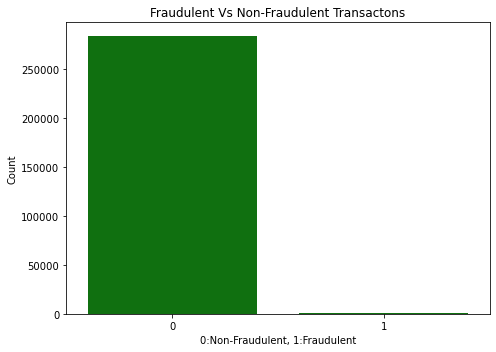

In [14]:
# Plot Bar Ghraph 
plt.figure(figsize=(7,5))
sns.barplot(x= df['Class'].value_counts().index, y= df['Class'].value_counts() , color='Green')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')
plt.ylabel('Count')
plt.title("Fraudulent Vs Non-Fraudulent Transactons")
plt.tight_layout()
plt.show() 

In [15]:
# Scale the features 'Time' and 'Amount'
scalar = StandardScaler()
df['scaled_time'] = scalar.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = scalar.fit_transform(df['Amount'].values.reshape(-1,1))

In [16]:
df = df.drop(['Time','Amount'], axis =1)

In [17]:
scaled_time = df['scaled_time']
scaled_amount = df['scaled_amount']

In [18]:
# Insert the new scaled features to first & second column
df = df.drop(['scaled_time','scaled_amount'], axis =1)
df.insert(0, 'scaled_time',scaled_time ) 
df.insert(1, 'scaled_amount',scaled_amount) 

In [19]:
df

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996823,0.244200,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996823,-0.342584,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996802,1.158900,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996802,0.139886,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996781,-0.073813,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-0.350252,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,1.642257,-0.254325,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.642278,-0.082239,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,1.642278,-0.313391,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [20]:
# as 'calss' featrure is highly skewed / biased towards non fradulant transactions we need to make them normaly distributed.
# Use Under sampling technique. Lets shuffle the data before Under sampling.
df = df.sample(frac = 1)

# Total Fraud Transactons are 473 numbers.So make new df such as 473 Non Fraud Transactons should be there.
fraud_df = df.loc[df['Class'] ==1]
non_fraud_df = df.loc[df['Class'] ==0][:473]

# Combine two data frames
under_sampled_df = pd.concat([fraud_df,non_fraud_df])

# Shuffle dataframe rows
new_df=under_sampled_df.sample(frac=1,random_state=42)
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
150647,-0.020789,-0.319221,-3.632809,5.437263,-9.136521,10.307226,-5.421830,-2.864815,-10.634088,3.018127,...,1.354065,2.309880,0.978660,-0.096130,0.432377,-0.435628,0.650893,1.693608,0.857685,1
17453,-1.391823,0.045996,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,...,1.724779,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,1
91471,-0.659782,-0.349773,1.241986,0.176725,0.392988,0.429775,-0.283240,-0.486837,-0.065171,-0.023957,...,-0.088494,-0.230505,-0.710993,0.087207,-0.008498,0.223383,0.098312,-0.034671,0.004861,0
141257,-0.223396,-0.353327,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,...,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,1
9035,-1.731517,-0.349333,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,...,1.488855,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1


In [21]:
new_df['Class'].value_counts()

1    473
0    473
Name: Class, dtype: int64

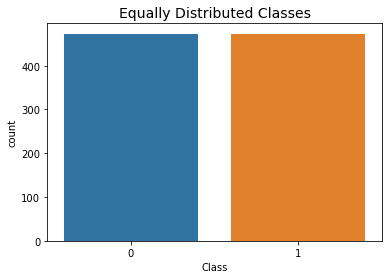

In [22]:
sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

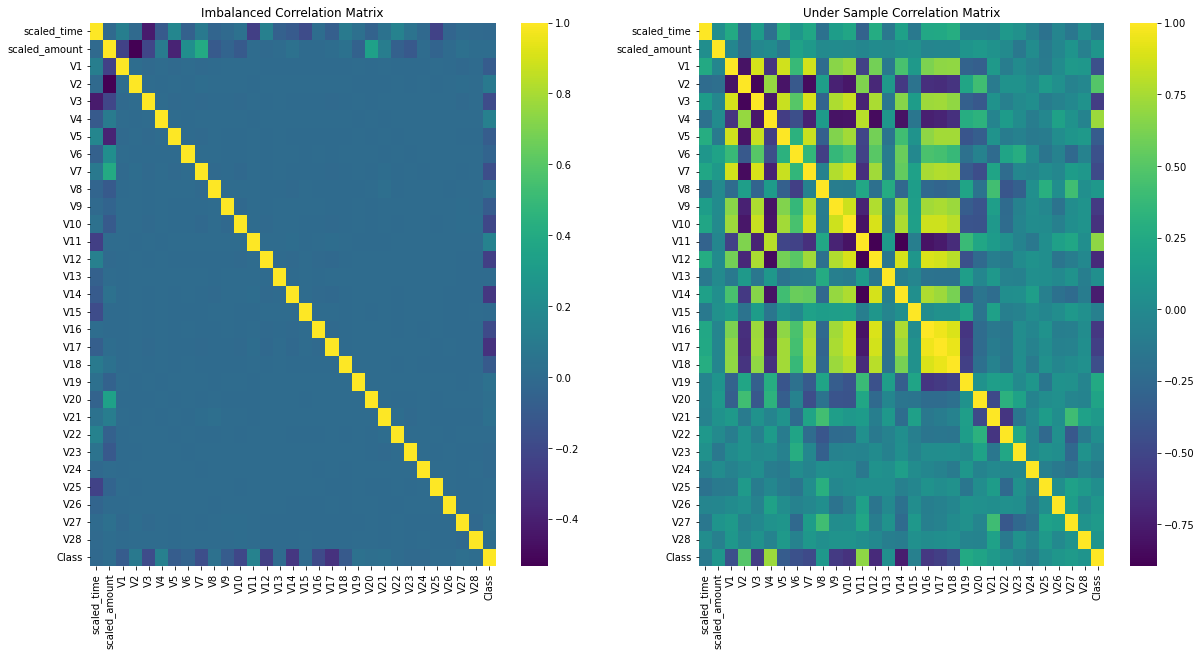

In [23]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.heatmap(df.corr(), cmap='viridis', annot=False)
plt.title("Imbalanced Correlation Matrix")

plt.subplot(1,2,2)
sns.heatmap(new_df.corr(), cmap='viridis', annot=False)
plt.title("Under Sample Correlation Matrix")

plt.show()

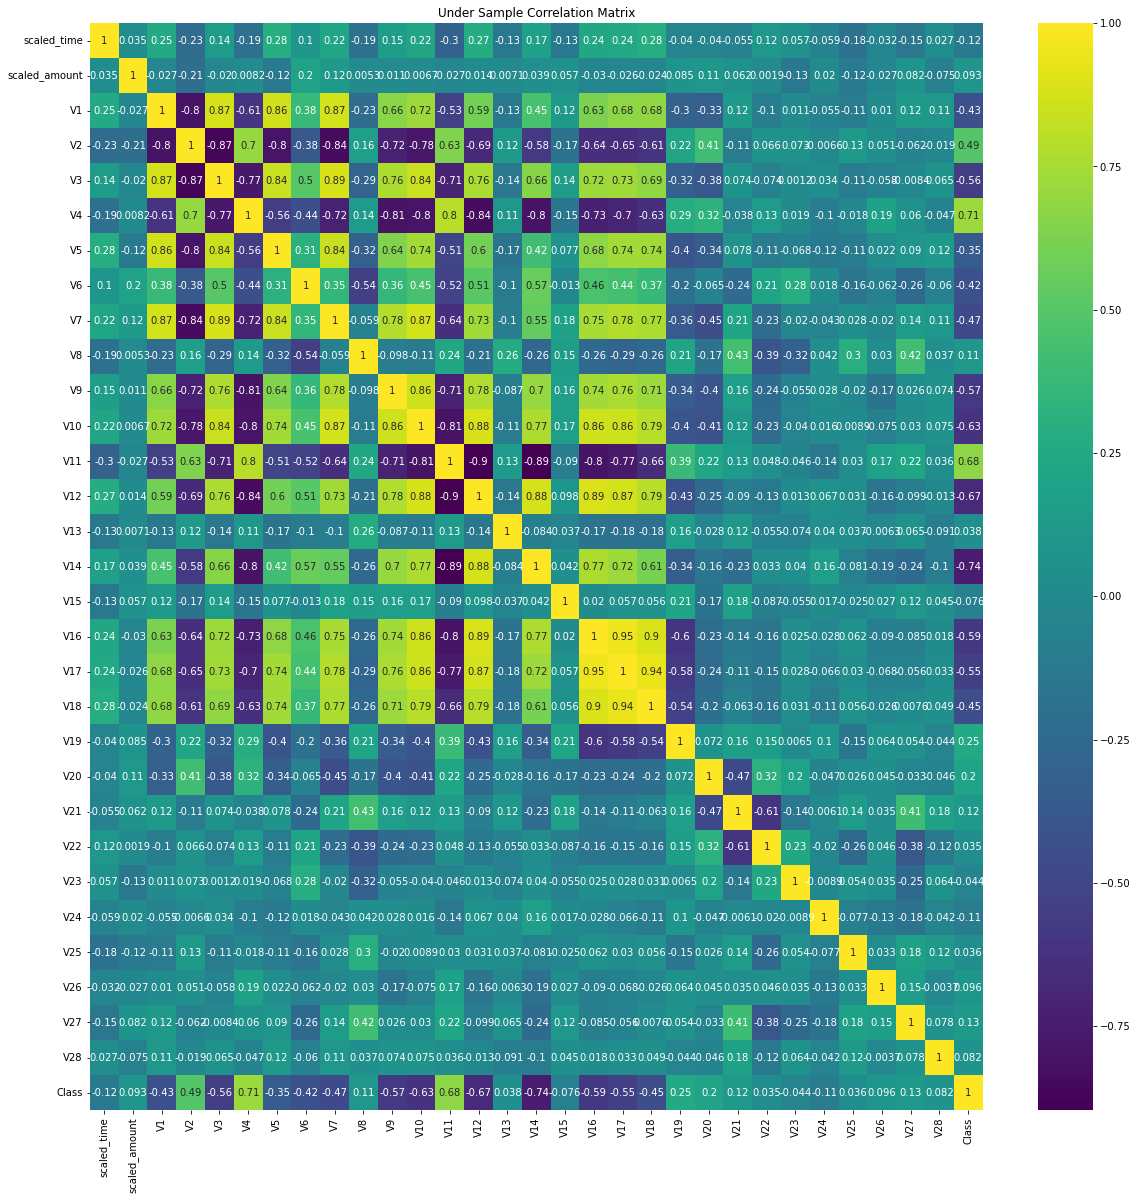

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(), cmap='viridis', annot=True)
plt.title("Under Sample Correlation Matrix")
plt.show()

In [25]:
# Calculate the correlation matrix
correlation_matrix = new_df.corr()

# Get the correlation values with the 'Class' column
correlation_with_class = correlation_matrix['Class'].drop('Class')

# Find the top 4 column pairs with the highest and lowest correlations with 'Class'
max_corr = correlation_with_class.nlargest(4)
min_corr = correlation_with_class.nsmallest(4)

# Extract column names and correlation values
max_corr_columns = [(col, correlation_with_class[col]) for col in max_corr.index]
min_corr_columns = [(col, correlation_with_class[col]) for col in min_corr.index]

print("Top 4 Columns with Highest Correlations with 'Class':")
for col, corr_value in max_corr_columns:
    print(f"{col}: Correlation Value: {corr_value:.4f}")

print("\nTop 4 Columns with Lowest Correlations with 'Class':")
for col, corr_value in min_corr_columns:
    print(f"{col}: Correlation Value: {corr_value:.4f}")

Top 4 Columns with Highest Correlations with 'Class':
V4: Correlation Value: 0.7119
V11: Correlation Value: 0.6770
V2: Correlation Value: 0.4928
V19: Correlation Value: 0.2485

Top 4 Columns with Lowest Correlations with 'Class':
V14: Correlation Value: -0.7432
V12: Correlation Value: -0.6735
V10: Correlation Value: -0.6280
V16: Correlation Value: -0.5910


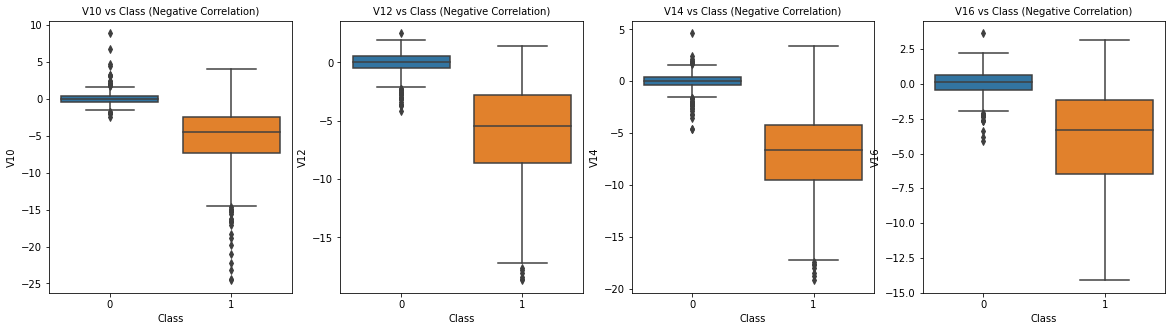

In [26]:
# Lowest Correlations with Class feature
fig, axes=plt.subplots(ncols=4,figsize=(20,5))

sns.boxplot(x='Class', y = 'V10', data = new_df, ax=axes[0])
axes[0].set_title('V10 vs Class (Negative Correlation)',fontsize=10)


sns.boxplot(x='Class', y = 'V12', data = new_df, ax=axes[1])
axes[1].set_title('V12 vs Class (Negative Correlation)',fontsize=10)

sns.boxplot(x='Class', y = 'V14', data = new_df, ax=axes[2])
axes[2].set_title('V14 vs Class (Negative Correlation)',fontsize=10)

sns.boxplot(x='Class', y = 'V16', data = new_df, ax=axes[3])
axes[3].set_title('V16 vs Class (Negative Correlation)',fontsize=10)

plt.show()

In [27]:
new_df

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
150647,-0.020789,-0.319221,-3.632809,5.437263,-9.136521,10.307226,-5.421830,-2.864815,-10.634088,3.018127,...,1.354065,2.309880,0.978660,-0.096130,0.432377,-0.435628,0.650893,1.693608,0.857685,1
17453,-1.391823,0.045996,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,...,1.724779,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,1
91471,-0.659782,-0.349773,1.241986,0.176725,0.392988,0.429775,-0.283240,-0.486837,-0.065171,-0.023957,...,-0.088494,-0.230505,-0.710993,0.087207,-0.008498,0.223383,0.098312,-0.034671,0.004861,0
141257,-0.223396,-0.353327,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,...,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,1
9035,-1.731517,-0.349333,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,...,1.488855,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189587,0.708914,-0.082160,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,...,0.445573,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,1
154718,0.165496,-0.353327,-5.603690,5.222193,-7.516830,8.117724,-2.756858,-1.574565,-6.330343,2.998419,...,0.227526,1.242896,0.428408,-0.101184,-0.520199,-0.176938,0.461450,-0.106625,-0.479662,1
254727,1.307238,5.556761,-0.442819,-5.783245,-4.344922,-0.630346,-1.427247,-0.366124,1.751916,-0.738369,...,2.454363,1.013346,0.004965,-1.439469,0.382621,0.087663,0.125897,-0.363083,0.156369,0
143728,-0.194564,-0.349333,-1.756712,3.266574,-4.153388,3.924526,-1.753772,-1.005787,-4.313217,1.560712,...,0.874720,0.911427,0.053061,-0.367701,-0.776338,0.292094,0.026000,1.062968,0.501148,1


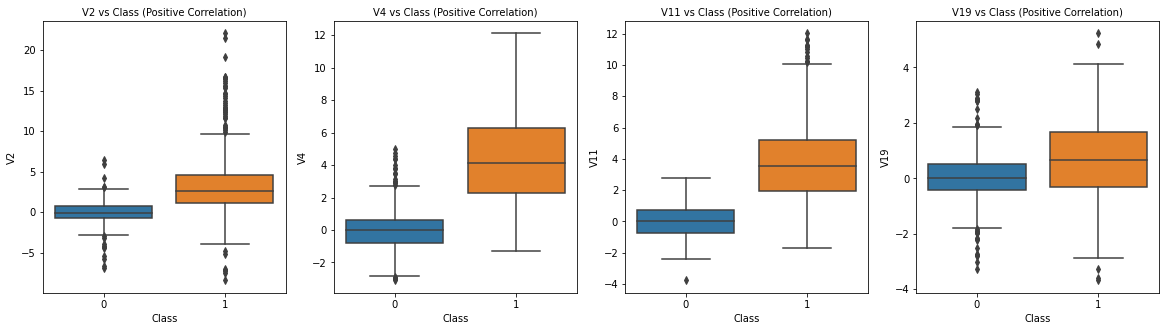

In [28]:
# Highest Correlations with Class feature
fig, axes=plt.subplots(ncols=4,figsize=(20,5))

sns.boxplot(x='Class', y = 'V2', data = new_df, ax=axes[0])
axes[0].set_title('V2 vs Class (Positive Correlation)',fontsize=10)

sns.boxplot(x='Class', y = 'V4', data = new_df, ax=axes[1])
axes[1].set_title('V4 vs Class (Positive Correlation)',fontsize=10)

sns.boxplot(x='Class', y = 'V11', data = new_df, ax=axes[2])
axes[2].set_title('V11 vs Class (Positive Correlation)',fontsize=10)

sns.boxplot(x='Class', y = 'V19', data = new_df, ax=axes[3])
axes[3].set_title('V19 vs Class (Positive Correlation)',fontsize=10)

plt.show()

In [29]:
# Calculate the quartiles for 'V10' feature in fraud cases (Class == 1)
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

# Calculate the interquartile range (IQR) for 'V10'
v10_iqr = q75 - q25
print('IQR: {}'.format(v10_iqr))

# Determine the lower and upper cutoff values
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('Cut Off: {}'.format(v10_cut_off))
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

# Find the outliers in 'V10' feature for fraud cases
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers: {}'.format(outliers))

# Remove the outliers from the DataFrame
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)


Quartile 25: -7.29780335001461 | Quartile 75: -2.44746925511151
IQR: 4.850334094903101
Cut Off: 7.275501142354651
V10 Lower: -14.57330449236926
V10 Upper: 4.8280318872431405
Feature V10 Outliers for Fraud Cases: 22
V10 outliers: [-16.2556117491401, -22.1870885620007, -16.7460441053944, -17.1415136412892, -15.5637913387301, -19.836148851696, -15.1241628144947, -18.9132433348732, -16.6011969664137, -15.3460988468775, -15.1237521803455, -16.3035376590131, -15.2318333653018, -14.9246547735487, -16.6496281595399, -23.2282548357516, -24.4031849699728, -14.6764702497464, -24.5882624372475, -20.9491915543611, -18.2711681738888, -15.2399619587112]


In [30]:
# Calculate the quartiles for 'V12' feature in fraud cases (Class == 1)
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

# Calculate the interquartile range (IQR) for 'V12'
v12_iqr = q75 - q25
print('IQR: {}'.format(v12_iqr))

# Determine the lower and upper cutoff values
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

# Find the outliers in 'V12' feature for fraud cases
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V12 outliers: {}'.format(outliers))

# Remove the outliers from the DataFrame
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)


Quartile 25: -8.00095678735609 | Quartile 75: -2.773685173098185
IQR: 5.227271614257905
Cut Off: 7.8409074213868575
V12 Lower: -15.841864208742948
V12 Upper: 5.067222248288672
Feature V12 Outliers for Fraud Cases: 16
V12 outliers: [-18.5536970096458, -17.2286622386187, -17.7691434633638, -15.969207520809, -16.3880541668327, -18.0475965708216, -17.003289445516, -16.5581971409376, -16.7283393320915, -18.4311310279993, -17.1829184301947, -18.6837146333443, -17.1504052507291, -17.6316063138707, -16.218610393127, -17.1313009454468]


In [31]:
# Calculate the quartiles for 'V14' feature in fraud cases (Class == 1)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

# Calculate the interquartile range (IQR) for 'V14'
v14_iqr = q75 - q25
print('IQR: {}'.format(v14_iqr))

# Determine the lower and upper cutoff values
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

# Find the outliers in 'V14' feature for fraud cases
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers: {}'.format(outliers))

# Remove the outliers from the DataFrame
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)


Quartile 25: -9.02052234853007 | Quartile 75: -4.19815560226043
IQR: 4.8223667462696405
Cut Off: 7.233550119404461
V14 Lower: -16.25407246793453
V14 Upper: 3.035394517144031
Feature V14 Outliers for Fraud Cases: 3
V10 outliers: [-17.6206343516773, 3.44242199594215, -16.3375959447735]


In [32]:
# Calculate the quartiles for 'V16' feature in fraud cases (Class == 1)
v16_fraud = new_df['V16'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v16_fraud, 25), np.percentile(v16_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))

# Calculate the interquartile range (IQR) for 'V16'
v16_iqr = q75 - q25
print('IQR: {}'.format(v16_iqr))

# Determine the lower and upper cutoff values
v16_cut_off = v16_iqr * 1.5
v16_lower, v16_upper = q25 - v16_cut_off, q75 + v16_cut_off
print('Cut Off: {}'.format(v16_cut_off))
print('V16 Lower: {}'.format(v16_lower))
print('V16 Upper: {}'.format(v16_upper))

# Find the outliers in 'V16' feature for fraud cases
outliers = [x for x in v16_fraud if x < v16_lower or x > v16_upper]
print('Feature V16 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V16 outliers: {}'.format(outliers))

# Remove the outliers from the DataFrame
new_df = new_df.drop(new_df[(new_df['V16'] > v16_upper) | (new_df['V16'] < v16_lower)].index)


Quartile 25: -5.4923518486697125 | Quartile 75: -0.9331922295765815
IQR: 4.559159619093131
Cut Off: 6.8387394286396965
V16 Lower: -12.331091277309408
V16 Upper: 5.905547199063115
Feature V16 Outliers for Fraud Cases: 4
V16 outliers: [-12.3913460034009, -12.4322791426353, -13.5632729563133, -13.2515419788937]


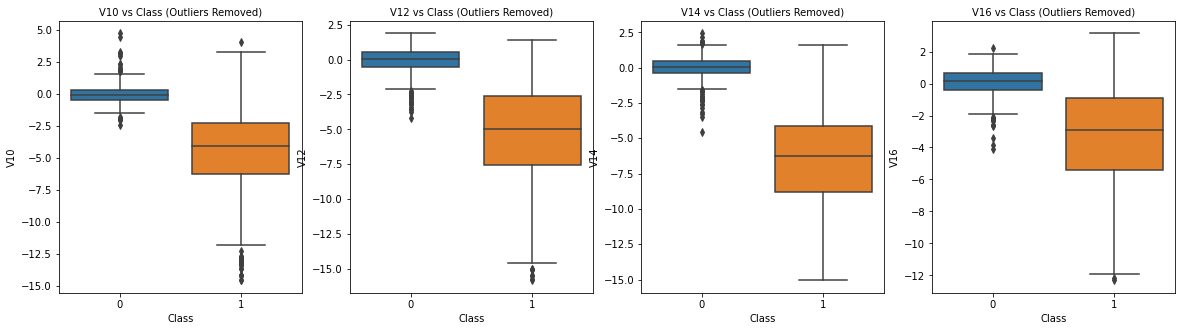

In [33]:
# Plot Boxplot after removal of outliers.
fig, axes=plt.subplots(ncols=4,figsize=(20,5))

sns.boxplot(x='Class', y = 'V10', data = new_df, ax=axes[0])
axes[0].set_title('V10 vs Class (Outliers Removed)',fontsize=10)


sns.boxplot(x='Class', y = 'V12', data = new_df, ax=axes[1])
axes[1].set_title('V12 vs Class (Outliers Removed)',fontsize=10)

sns.boxplot(x='Class', y = 'V14', data = new_df, ax=axes[2])
axes[2].set_title('V14 vs Class (Outliers Removed)',fontsize=10)

sns.boxplot(x='Class', y = 'V16', data = new_df, ax=axes[3])
axes[3].set_title('V16 vs Class (Outliers Removed)',fontsize=10)

plt.show()

In [34]:
new_df

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
17453,-1.391823,0.045996,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,...,1.724779,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,1
91471,-0.659782,-0.349773,1.241986,0.176725,0.392988,0.429775,-0.283240,-0.486837,-0.065171,-0.023957,...,-0.088494,-0.230505,-0.710993,0.087207,-0.008498,0.223383,0.098312,-0.034671,0.004861,0
141257,-0.223396,-0.353327,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,...,1.129532,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,1
189200,0.705313,5.630164,-0.988048,-5.335742,-2.618437,1.088294,-0.911409,2.330617,1.205792,0.224771,...,2.767037,0.548351,-1.627468,-0.804493,-0.901290,-1.324705,0.068876,-0.287303,0.191147,0
206914,0.876729,1.391688,1.191883,-1.343128,-2.471057,0.627988,0.026927,-0.629676,0.716088,-0.179278,...,0.632020,0.065570,-0.778225,-0.125938,0.611303,-0.345433,0.388520,-0.176610,0.026188,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189587,0.708914,-0.082160,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,...,0.445573,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,1
154718,0.165496,-0.353327,-5.603690,5.222193,-7.516830,8.117724,-2.756858,-1.574565,-6.330343,2.998419,...,0.227526,1.242896,0.428408,-0.101184,-0.520199,-0.176938,0.461450,-0.106625,-0.479662,1
254727,1.307238,5.556761,-0.442819,-5.783245,-4.344922,-0.630346,-1.427247,-0.366124,1.751916,-0.738369,...,2.454363,1.013346,0.004965,-1.439469,0.382621,0.087663,0.125897,-0.363083,0.156369,0
143728,-0.194564,-0.349333,-1.756712,3.266574,-4.153388,3.924526,-1.753772,-1.005787,-4.313217,1.560712,...,0.874720,0.911427,0.053061,-0.367701,-0.776338,0.292094,0.026000,1.062968,0.501148,1


In [35]:
# Define dependant & independant variables.
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [36]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print("Number of transactions on train dataset: ", len(X_train))
print("Number of transactions on test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number of transactions on train dataset:  718
Number of transactions on test dataset:  180
Total number of transactions:  898


In [38]:
# we are defining a dictionary named "classifiers" that stores four different simple classifiers.
classifiers = {"Logistic Regression": LogisticRegression(),"K Nearest Neighbors": KNeighborsClassifier(),
"Support Vector Classifier": SVC(),"Decision Tree Classifier": DecisionTreeClassifier(),
"Random Forest Classifier": RandomForestClassifier()}

In [39]:
# iterate over the classifiers dictionary using a for loop to access each classifier and its corresponding key. 
# Then, we fit each classifier using the training data X_train and y_train.

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    print("Classifier", classifier.__class__.__name__, "has a training score of", round (training_score.mean(),3))

Classifier LogisticRegression has a training score of 0.926
Classifier KNeighborsClassifier has a training score of 0.929
Classifier SVC has a training score of 0.918
Classifier DecisionTreeClassifier has a training score of 0.894
Classifier RandomForestClassifier has a training score of 0.919


In [40]:
log_reg = classifiers["Logistic Regression"]
knn = classifiers["K Nearest Neighbors"]
svc = classifiers["Support Vector Classifier"]
dt_clf = classifiers["Decision Tree Classifier"]
rf_clf = classifiers["Random Forest Classifier"]

In [41]:
# Calculating cross-validation scores for different classifiers

log_cv_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score:', round(log_cv_score.mean(), 2))

knn_cv_score = cross_val_score(knn, X_train, y_train, cv=5)
print('K Nearest Neighbors Cross Validation Score:', round(knn_cv_score.mean(), 2))

svc_cv_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score:', round(svc_cv_score.mean(), 2))

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=5)
print('Decision Tree Classifier Cross Validation Score:', round(dt_cv_score.mean(), 2))

rf_cv_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
print('Random Forest Classifier Cross Validation Score:', round(rf_cv_score.mean(), 2))


Logistic Regression Cross Validation Score: 0.93
K Nearest Neighbors Cross Validation Score: 0.93
Support Vector Classifier Cross Validation Score: 0.92
Decision Tree Classifier Cross Validation Score: 0.89
Random Forest Classifier Cross Validation Score: 0.92


In [42]:
# Calculate predicted values

log_reg_pred = log_reg.predict(X_test)
knn_pred     = knn.predict(X_test)
svc_pred     = svc.predict (X_test)
dt_clf_pred  = dt_clf.predict(X_test)
rf_clf_pred  = rf_clf.predict(X_test)

In [43]:
# Calculate ROC AUC score
print("Logistic Regression ROC AUC score :", round(roc_auc_score(y_test,log_reg_pred),2))
print("K Nearest Neighbors ROC AUC score :", round(roc_auc_score(y_test,knn_pred),2))
print("Support Vector Classifier ROC AUC score :", round(roc_auc_score(y_test,svc_pred),2))
print("Decision Tree Classifier ROC AUC score :", round(roc_auc_score(y_test,dt_clf_pred),2))
print("Random Forest Classifier ROC AUC score :", round(roc_auc_score(y_test,rf_clf_pred),2))

Logistic Regression ROC AUC score : 0.96
K Nearest Neighbors ROC AUC score : 0.95
Support Vector Classifier ROC AUC score : 0.94
Decision Tree Classifier ROC AUC score : 0.88
Random Forest Classifier ROC AUC score : 0.95


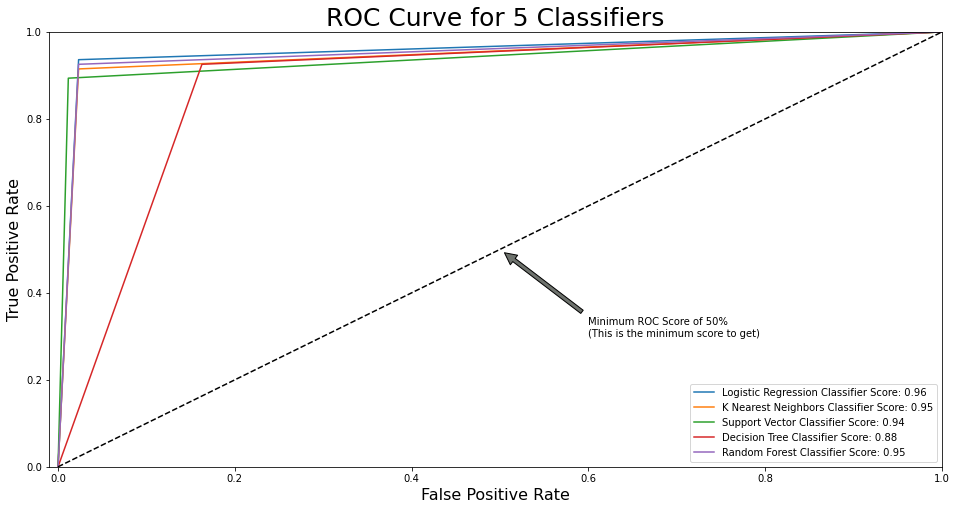

In [44]:
# Plot ROC curve for all classifiers.
log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_reg_pred)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
dt_clf_fpr, dt_clf_tpr, dt_clf_threshold = roc_curve(y_test, dt_clf_pred)
rf_clf_fpr, rf_clf_tpr, rf_clf_threshold = roc_curve(y_test, rf_clf_pred)

def all_roc_curves(log_fpr, log_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, dt_clf_fpr, dt_clf_tpr,rf_clf_fpr, rf_clf_tp):
    plt.figure(figsize=(16, 8))
    plt.title('ROC Curve for 5 Classifiers', fontsize=25)
    plt.plot(log_fpr, log_tpr, label=f'Logistic Regression Classifier Score: {roc_auc_score(y_test, log_reg_pred):.2f}')
    plt.plot(knn_fpr, knn_tpr, label=f'K Nearest Neighbors Classifier Score: {roc_auc_score(y_test, knn_pred):.2f}')
    plt.plot(svc_fpr, svc_tpr, label=f'Support Vector Classifier Score: {roc_auc_score(y_test, svc_pred):.2f}')
    plt.plot(dt_clf_fpr, dt_clf_tpr, label=f'Decision Tree Classifier Score: {roc_auc_score(y_test, dt_clf_pred):.2f}')
    plt.plot(rf_clf_fpr, rf_clf_tpr, label=f'Random Forest Classifier Score: {roc_auc_score(y_test, rf_clf_pred):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50%\n(This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                 arrowprops=dict(facecolor='#6E726D', shrink=0.05))
    plt.legend()

all_roc_curves(log_fpr, log_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, dt_clf_fpr, dt_clf_tpr,rf_clf_fpr, rf_clf_tpr)
plt.show()

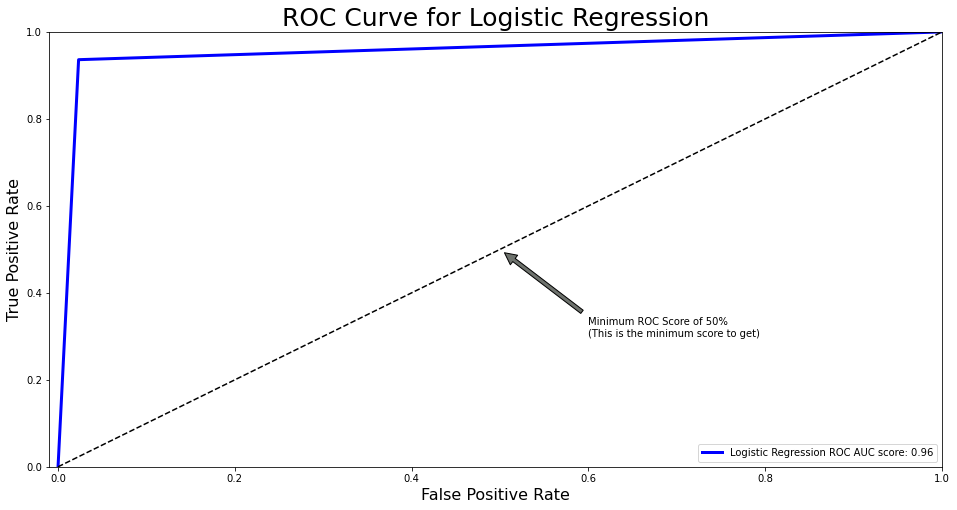

In [53]:
# Plot ROC curve for Logistic Regression .

plt.figure(figsize=(16, 8))
plt.title('ROC Curve for Logistic Regression', fontsize=25)
plt.plot(log_fpr, log_tpr , color='b', lw=3,
         label="Logistic Regression ROC AUC score: {:.2f}".format(roc_auc_score(y_test, log_reg_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50%\n(This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                 arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()
plt.show()


In [50]:
# Classification Report 
rf_clf_Report = classification_report(y_test, log_reg_pred)
print(rf_clf_Report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        86
           1       0.98      0.94      0.96        94

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



In [54]:
# confusion_matrix for Logistic Regression.
matrics =confusion_matrix(y_test, log_reg_pred)

TP = matrics[1, 1]
FP = matrics[0, 1]
TN = matrics[0, 0]
FN = matrics[1, 0]
print("True Positives:", TP)
print("False Positives:", FP)
print("True Negative:", TN)
print("False Negative:", FN)

True Positives: 88
False Positives: 2
True Negative: 84
False Negative: 6


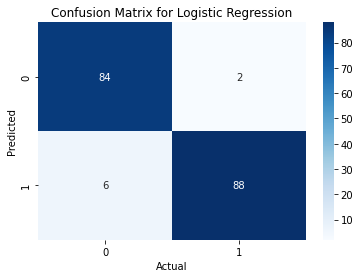

In [55]:
# Create a heatmap for the confusion matrix
sns.heatmap(matrics, annot=True,  cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Conclusion :
The Credit Fraud Detection project successfully implemented and evaluated various classification models to detect fraudulent credit card transactions. In this project we have used Logistic Regression,K Nearest Neighbors, Support Vector Classifier, Decision Tree Classifier,Random Forest Classifier. Amongst all Logistic Regression Model demonstrated promising performance with high accuracy, precision, recall, and ROC AUC score. The model's effectiveness in minimizing financial losses and ensuring customer trust makes it valuable for real-world credit card security applications. 